In [45]:
import matplotlib.pyplot as plt
import os, sys
import pandas as pd 
import seaborn as sns
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter
import gensim
from gensim import corpora
import re

ModuleNotFoundError: No module named 'numpy.char'

In [8]:
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '_')))

In [9]:
data = pd.read_csv(r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\raw_analyst_ratings.csv")
data

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [10]:
data = data.drop(columns=["Unnamed: 0"])

In [11]:
data

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


CHECKING NaN values 

In [ ]:
null_value=data.isnull().values.any()
print(null_value)

False


# Descriptive Statistics

statistics for textual lengths

In [13]:
# Calculate the length of each headline
data['headline_length'] = data['headline'].apply(len)

# Get basic statistics for the headline lengths
headline_stats = data['headline_length'].describe()

print(headline_stats)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


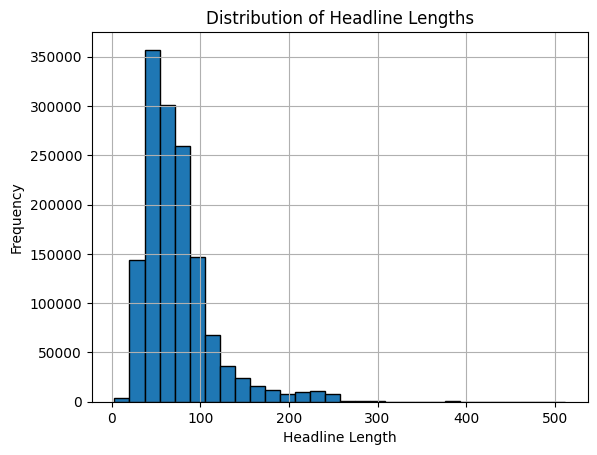

In [16]:
data['headline_length'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


number of articles per publisher 

In [17]:
# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()

# Display the top 10 most active publishers
print(publisher_counts.head(10))

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


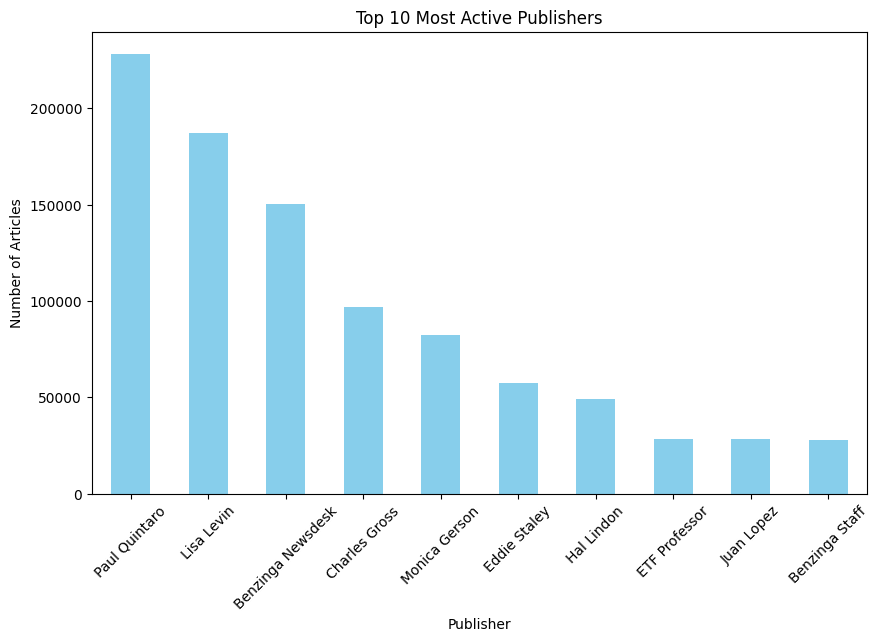

In [19]:
# Plot the top 10 publishers
publisher_counts.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()



Analyzing Publication Trends Over Time: Identifying Patterns in News Frequency by Day and Event

In [20]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [21]:
data['day_of_week'] = data['date'].dt.day_name()

In [22]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [23]:
articles_by_day = data['day_of_week'].value_counts()
print(articles_by_day)

day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


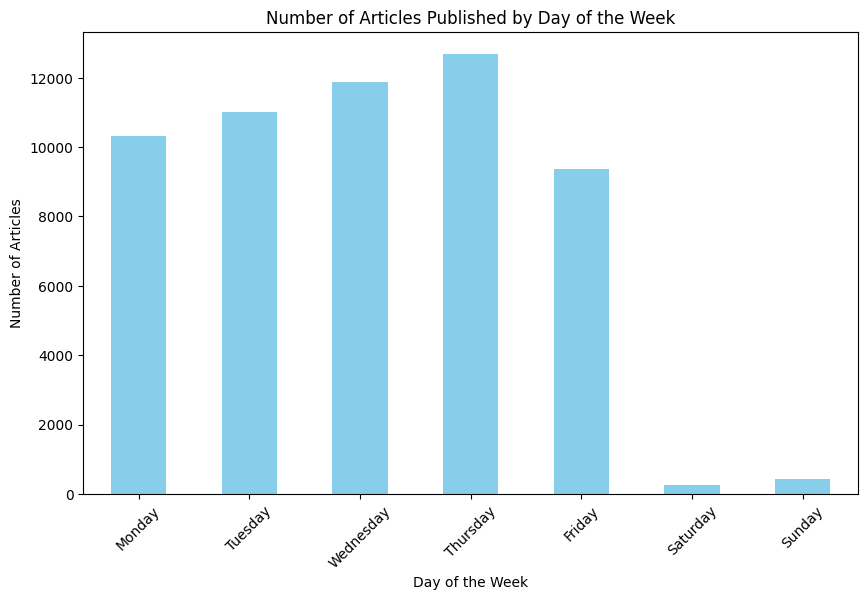

In [24]:
# Plot articles by day of the week
articles_by_day = articles_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Ensure order
articles_by_day.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Articles Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

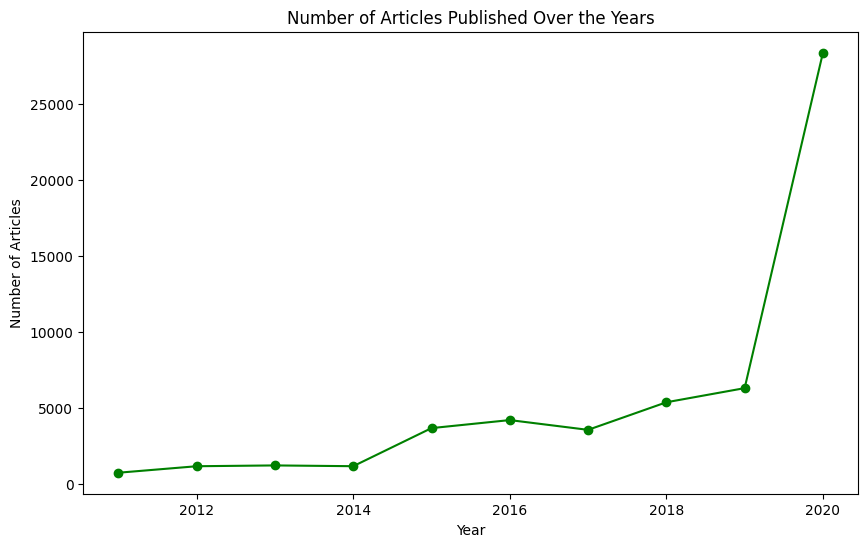

In [25]:
articles_by_year = data['year'].value_counts().sort_index()
articles_by_year.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Number of Articles Published Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()


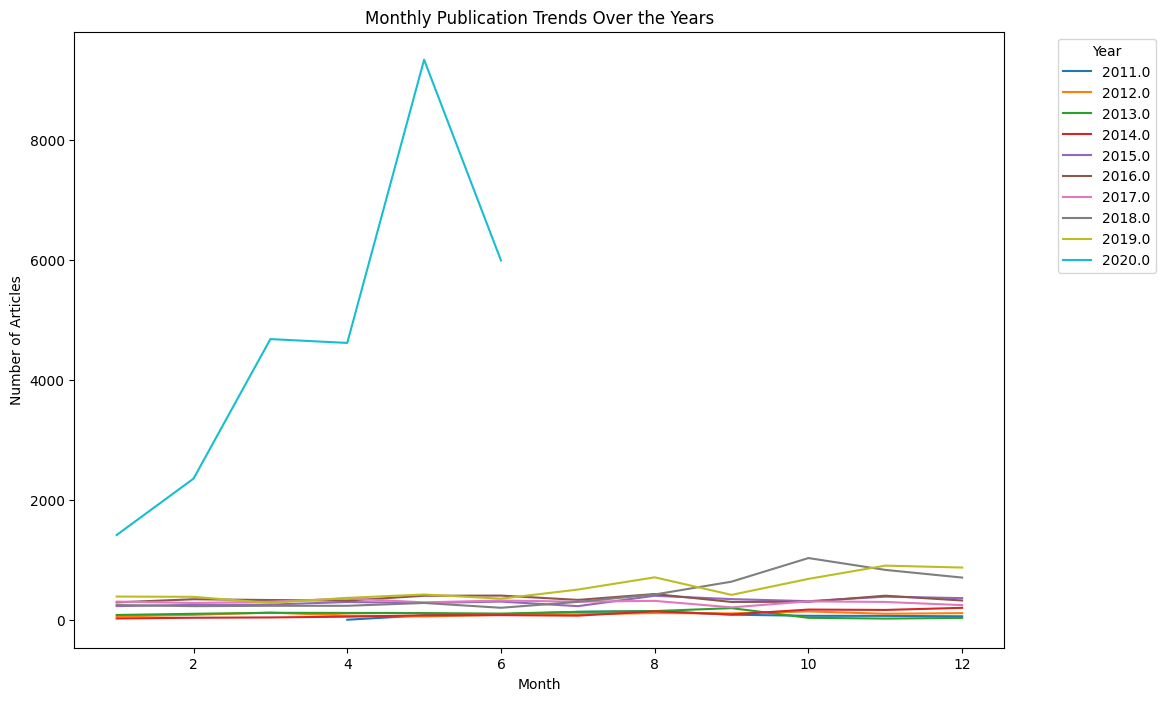

In [26]:
articles_by_month = data.groupby(['year', 'month']).size().unstack(level=0)
articles_by_month.plot(kind='line', figsize=(12, 8))
plt.title('Monthly Publication Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\fikad\AppData\Local\Temp\ipykernel_12628\156573937.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_count = data.resample('M').size()  # Monthly frequency


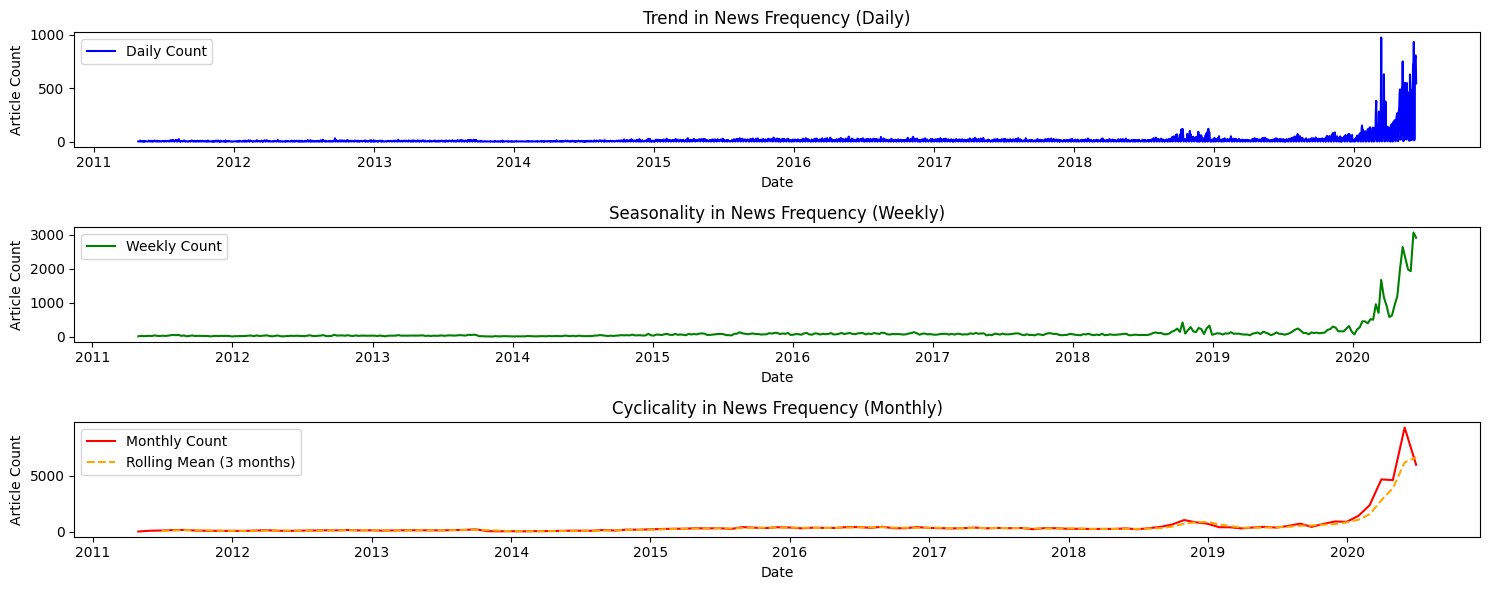

In [ ]:


# Assuming 'data' is your DataFrame with a 'date' column
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Resample the data to get daily, weekly, and monthly counts of articles
daily_count = data.resample('D').size()  # Daily frequency
weekly_count = data.resample('W').size()  # Weekly frequency
monthly_count = data.resample('M').size()  # Monthly frequency

# Plotting Trend, Seasonality, and Cyclicality

# Set up the figure for the plot
plt.figure(figsize=(15, 6))

# Plot the trend
plt.subplot(3, 1, 1)
plt.plot(daily_count, label="Daily Count", color='blue')
plt.title('Trend in News Frequency (Daily)')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.legend()

# Plot the seasonal trend (using weekly data)
plt.subplot(3, 1, 2)
plt.plot(weekly_count, label="Weekly Count", color='green')
plt.title('Seasonality in News Frequency (Weekly)')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.legend()

# Plot cyclicality (monthly data with a rolling mean)
plt.subplot(3, 1, 3)
plt.plot(monthly_count, label="Monthly Count", color='red')
plt.plot(monthly_count.rolling(3).mean(), label="Rolling Mean (3 months)", color='orange', linestyle='--')
plt.title('Cyclicality in News Frequency (Monthly)')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

Text Analysis(Sentiment analysis & Topic Modeling)

Perform sentiment analysis on the headlines to determine the sentiment (positive, negative, neutral) associated with the news articles

In [30]:
# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fikad\AppData\Roaming\nltk_data...


True

In [31]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [32]:
# Create a new column 'sentiment' with sentiment scores
data['sentiment_score'] = data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on the compound score
def sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment label to the headlines
data['sentiment'] = data['sentiment_score'].apply(sentiment_label)

# Show the sentiment analysis results
print(data[['headline', 'sentiment_score', 'sentiment']].head())


                                                                    headline  \
date                                                                           
2020-06-05 10:30:54-04:00            Stocks That Hit 52-Week Highs On Friday   
2020-06-03 10:45:20-04:00         Stocks That Hit 52-Week Highs On Wednesday   
2020-05-26 04:30:07-04:00                      71 Biggest Movers From Friday   
2020-05-22 12:45:06-04:00       46 Stocks Moving In Friday's Mid-Day Session   
2020-05-22 11:38:59-04:00  B of A Securities Maintains Neutral on Agilent...   

                           sentiment_score sentiment  
date                                                  
2020-06-05 10:30:54-04:00            0.000   neutral  
2020-06-03 10:45:20-04:00            0.000   neutral  
2020-05-26 04:30:07-04:00            0.000   neutral  
2020-05-22 12:45:06-04:00            0.000   neutral  
2020-05-22 11:38:59-04:00            0.296  positive  


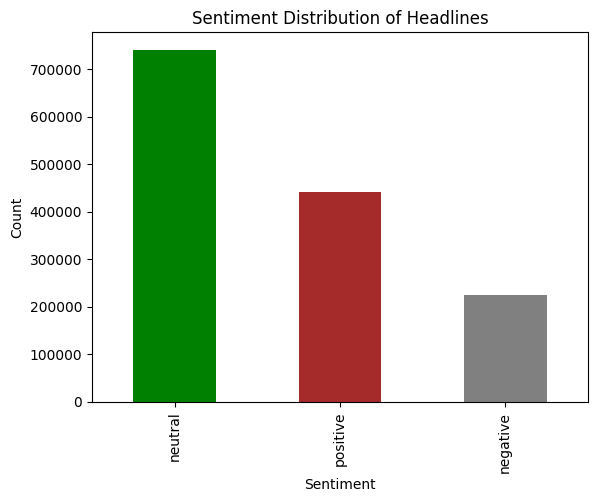

In [ ]:
# Plot the sentiment distribution
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'brown', 'gray'])
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Identify Common Keywords and Phrases


In [40]:
# Download necessary resources from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fikad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fikad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# Tokenize and clean the headlines
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words (1 or 2 letters)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenize into words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Apply cleaning to the headlines
data['cleaned_headline'] = data['headline'].apply(clean_text)

# Check the cleaned headlines
print(data[['headline', 'cleaned_headline']].head())

NameError: name 're' is not defined

In [ ]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10)  # Adjust 'max_features' for more/less keywords

# Fit and transform the cleaned headlines to extract the top keywords
X = vectorizer.fit_transform(data['cleaned_headline'].apply(lambda x: ' '.join(x)))

# Get the feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Show the top keywords
print("Top Keywords (by TF-IDF):", keywords)

In [ ]:
# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(data['cleaned_headline'])
corpus = [dictionary.doc2bow(text) for text in data['cleaned_headline']]

# Train the LDA model
lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics and their top keywords
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


In [ ]:
# Get the frequency of words in the cleaned headlines
all_words = [word for headline in data['cleaned_headline'] for word in headline]
word_counts = Counter(all_words)

# Plot the top 10 most common words
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()